# Scenario
Looking back at the season that was 2018-2019 and looking to delve into sight deeper insights. Using the data to see how clubs are similar stylistically, in the way they pass, attack and score goals. 

This data set is wide ranging in the sense it encompasses stats seen on a regular league table but goes beyond looking at how teams pass and keep possession, how they defend, tackle as well as looking at market values of a team and how much money each team was allotted from the TV rights deal. 
This data was gathered from 
1. BBC Sports Football
2. Premierleague.com 
3. Transfermarkt.co.uk 


## Goals
Some goals of this project: 
1.	Is this data clean? 
2.	How is the point distribution of the epl team? and which team is an anomaly?
3.	Which team has the best attack? 
4.	Which team has the best defence? 
5.	Which team is good in the financial aspect? 
6.	Explore your creativity!


# Import Module

In [1]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Load Data

In [2]:
url = "https://raw.githubusercontent.com/Syukrondzeko/Fellowship/main/epl_1819.csv"
download = requests.get(url).content
data = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [3]:
#Summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

# Check Missing Values and Duplicate

In [4]:
data.isnull().sum()

Team                             0
category                         0
general_league_position          0
finance _live_games_televised    0
finance _tv_revenue              0
general_matches_played           0
general_won                      0
general_draw                     0
general_lost                     0
attack_scored                    0
defence_goals_conceeded          0
general_goal_difference          0
general_points                   0
general_squad_size               0
general_squad_average_age        0
general_squad_foreigners         0
finance _team_market             0
finance _market_average          0
attack_passes                    0
attack_passes_through            0
attack_passes_long               0
attack_passes_back               0
attack_crosses                   0
attack_corners_taken             0
attack_shots                     0
attack_shots_on_target           0
attack_goals_headed              0
attack_goals_penalty             0
attack_goals_box    

In [5]:
data.duplicated().sum()

0

# Change Data Type

## Check

In [6]:
data['attack_passes'].head(3)

0    26,581
1    23,638
2    25,070
Name: attack_passes, dtype: object

In [7]:
data['attack_passes_long'].head(3)

0    1,814
1    2,250
2    1,774
Name: attack_passes_long, dtype: object

In [8]:
data['attack_passes_back'].head(3)

0    4,240
1    3,416
2    3,874
Name: attack_passes_back, dtype: object

In [9]:
data['defence_clearances'].tail(5)

15    1,068
16      921
17      978
18      971
19      658
Name: defence_clearances, dtype: object

## Change

In [10]:
data['attack_passes'] = data['attack_passes'].str.replace(',','').astype(int)
data['attack_passes_long'] = data['attack_passes_long'].str.replace(',','').astype(int)
data['attack_passes_back'] = data['attack_passes_back'].str.replace(',','').astype(int)
data['defence_clearances'] = data['defence_clearances'].str.replace(',','').astype(int)

In [11]:
df = data.copy()

# General Point Distribution
Distribution of general_points column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


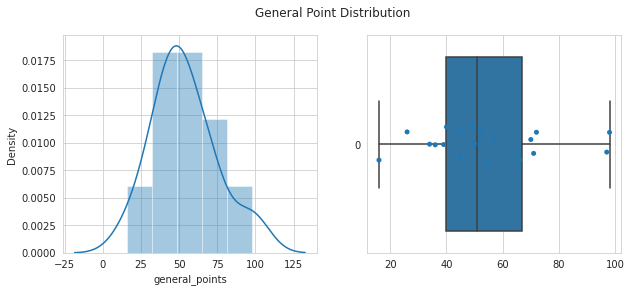

In [12]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('General Point Distribution')
plt.subplot(121)
sns.distplot(df['general_points'])
plt.subplot(122)
sns.boxplot(data=df['general_points'], orient='h')
sns.stripplot(data=df['general_points'], orient='h')
plt.show()

In [13]:
print("General Point Average: ",df['general_points'].mean())
print("General Point Median: ",df['general_points'].median())
print("Skewness: ", df['general_points'].skew())
print("Kurtosis: ",df['general_points'].kurt())

General Point Average:  53.45
General Point Median:  51.0
Skewness:  0.6098933299918191
Kurtosis:  0.43225790198093383


In [14]:
df['general_points'].describe()

count    20.000000
mean     53.450000
std      21.007455
min      16.000000
25%      39.750000
50%      51.000000
75%      67.000000
max      98.000000
Name: general_points, dtype: float64

# Best Team Attack
Best Team Attack based on attack_scored

In [15]:
df_att = df[['Team','attack_scored']].sort_values(by=['attack_scored'], ascending=False).reset_index(drop=True).head(5)
df_att

,Team,attack_scored
0,Manchester City,95
1,Liverpool,89
2,Arsenal,73
3,Tottenham,67
4,Manchester United,65


Text(0.5, 1.0, 'Best Attacking Team')

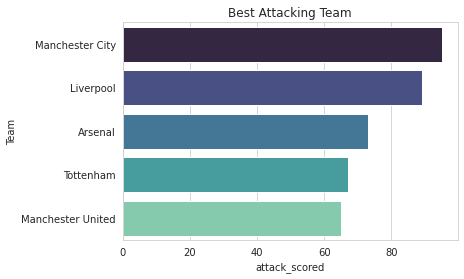

In [16]:
sns.barplot(x=df_att['attack_scored'], y=df_att['Team'], data=df_att, orient='h', palette="mako")
plt.title('Best Attacking Team')

# Best Defence Team
Best Defence Team based on defence_saves, defence_blocks, defence_interceptions, defence_tackles, ,defence_tackles_last_man, defence_clearances

In [17]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
deff = df.iloc[:,34:42]
deff_norm = pd.DataFrame(scaler.fit_transform(deff))
df['defence_total'] = deff_norm.sum(axis=1)
df['defence_total'] = 1/df['defence_total']
deff_plot = df[['Team','defence_total']].sort_values(by='defence_total', ascending=False).head(5)
deff_plot

,Team,defence_total
0,Manchester City,1.443940
1,Liverpool,0.731021
2,Chelsea,0.586638
5,Manchester United,0.311798
3,Tottenham,0.302974


Text(0.5, 1.0, 'Best Defence Team')

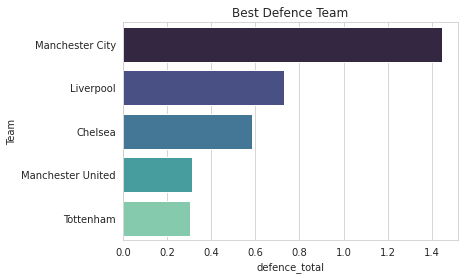

In [18]:
sns.barplot(x=deff_plot['defence_total'], y=deff_plot['Team'], data=deff_plot, orient='h', palette="mako")
plt.title('Best Defence Team')

# Good in Financial Aspect

Text(0.5, 1.0, 'Best Team in Financial Aspect')

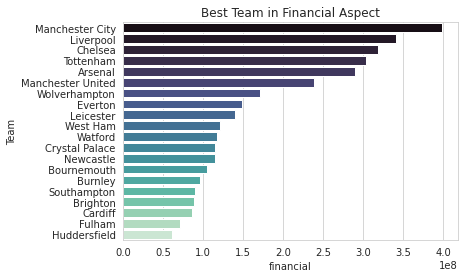

In [19]:
df_fin = df[['finance _tv_revenue','finance _team_market','finance _market_average']]
df['financial'] = df_fin.mean(axis=1)
sns.barplot(x=df['financial'], y=df['Team'], data=df, orient='h', palette="mako")
plt.title('Best Team in Financial Aspect')

In [20]:
dfff = df[['Team','financial']].sort_values(by='financial', ascending=False)
dfff.to_csv('tes.csv')

# Correlation

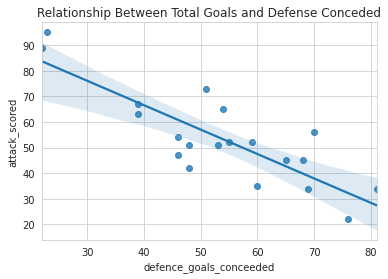

In [21]:
dff = data.copy()
plt.figure(figsize = (6,4))
sns.regplot(x='defence_goals_conceeded',y='attack_scored',data = dff)
plt.title('Relationship Between Total Goals and Defense Conceded')
plt.show()

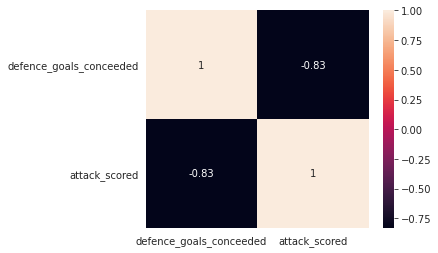

In [22]:
#Correllation coefficient
plt.figure(figsize=(5,4))
sns.heatmap(dff[['defence_goals_conceeded','attack_scored']].corr(),annot=True)
plt.show()

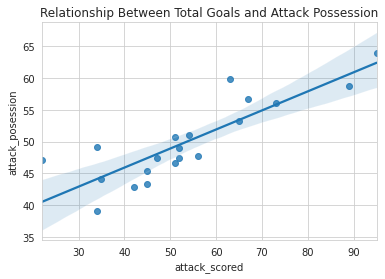

In [23]:
plt.figure(figsize = (6,4))
sns.regplot(x='attack_scored',y='attack_posession',data = dff)
plt.title('Relationship Between Total Goals and Attack Possession')
plt.show()

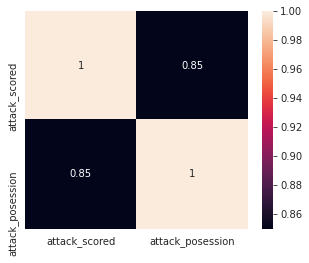

In [24]:
#Correllation coefficient
plt.figure(figsize=(5,4))
sns.heatmap(dff[['attack_scored','attack_posession']].corr(),annot=True)
plt.show()

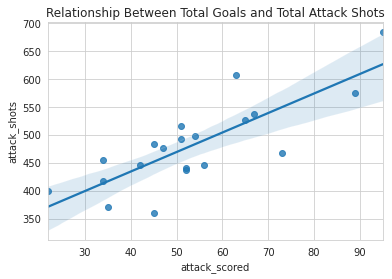

In [25]:
plt.figure(figsize = (6,4))
sns.regplot(x='attack_scored',y='attack_shots',data = dff)
plt.title('Relationship Between Total Goals and Total Attack Shots')
plt.show()

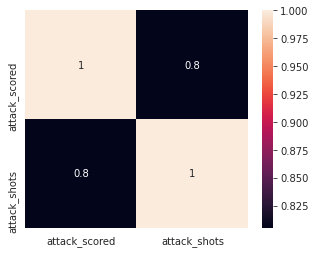

In [26]:
#Correllation coefficient
plt.figure(figsize=(5,4))
sns.heatmap(dff[['attack_scored','attack_shots']].corr(),annot=True)
plt.show()

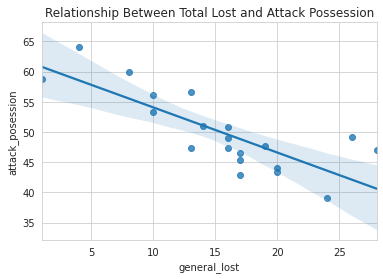

In [27]:
plt.figure(figsize = (6,4))
sns.regplot(x='general_lost',y='attack_posession',data = dff)
plt.title('Relationship Between Total Lost and Attack Possession')
plt.show()

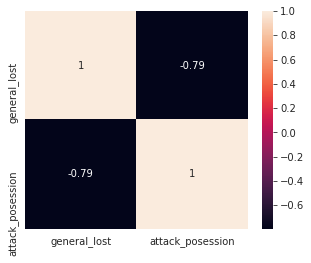

In [28]:
#Correllation coefficient
plt.figure(figsize=(5,4))
sns.heatmap(dff[['general_lost','attack_posession']].corr(),annot=True)
plt.show()